# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2023

## Project 1 - The Trapped Knight
Due Friday, February 10

### Description

In this project, you will write a computer code to generate a particular sequence of numbers described in the following YouTube video: [The Trapped Knight](https://www.youtube.com/watch?v=RGQe8waGJ4w)

Begin by watching the video and make sure you understand exactly how the sequence is generated. Then continue to implement the code in the 3 parts described below.

### Part 1 - Initialize the board

We will store the chess board in a 2d-array of integers. The size of the board is $(2n+1)$-by-$(2n+1)$, for a given integer $n$. This means the board extends from the center square by $n$ steps in all directions.

The first step is to initialize the board by filling it with the integers described in the video. Finish the implementation of the function definition in the cell below such that it returns this "spiral pattern" for any given input parameter $n$.

An example is given below: for the following input
```julia
board = initialize_board(3)
```
the correct output is
```julia
7×7 Matrix{Int64}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49
```

Test your function for various values of $n$ to make sure it is correct before you continue.

*Hints*:
- Note that since Julia uses 1-based indexing, the center square of the array `board` is given by element `board[n+1,n+1]`.
- After the center $1$ has been placed, there are exactly $n$ "circles" of numbers of increasing radius. This is naturally implemented using a for-loop.
- In each "circle", there are 4 segments going up, left, down, and right. These are also naturally implemented using a sequence of 4 for-loops.

In [1]:
# Initializes the board on a [-n:n]x[-n:n] domain with spiral numbers
#
# Example: initialize_board(2) returns
# 17 16 15 14 13
# 18  5  4  3 12
# 19  6  1  2 11
# 20  7  8  9 10
# 21 22 23 24 25
#
# Inputs:
#  n     = integer size of board to allocate
# Outputs: 
#  board = 2n+1 x 2n+1 integer array filled with spiral numbers
function initialize_board(n)
    
    #initialize the board and center piece
    dim = 2*n + 1
    board = zeros(Int64, dim, dim)
    board[(n+1), (n+1)] = 1
    
    curr = 1
    
    #accounts for each circle of increasing radius
    for i = 1:n
        #up and right
        for p = (1-i):i 
            curr += 1
            board[n+1-p, n+1+i] = curr
            
        end
        
        #top left stretch
        for q = (1-i):i 
            curr += 1
            board[n+1-i,n+1-q] = curr
        end
        
        #down and left
        for j = (1-i):i 
            curr += 1
            board[n+1+j, n+1-i] = curr

        end
        
        #bottom and right
        for k = (1-i):i 
            curr += 1
            board[n+1+i, n+1+k] = curr
        end
        
    end
    
    #check to make sure every piece has been set to a value
    for g = 1:(2n+1)
        for h = 1:(2n+1)
            if board[g,h] == 0
                error("Board piece not set.")
            end
        end
    end
    
    #check to see that the bottom right corner is (2n+1)^2
    if board[2n+1, 2n+1] != (2n+1)^2
        error("Wrong value for bottom right corner.")
    end
    
    #check to see that the correct amount of pieces are set
    if curr != (2n+1)^2
        error("Wrong number of pieces")
    end
    
    return board
    
end

initialize_board (generic function with 1 method)

### Part 2 - Simulate the walk

Next we will write the function to simulate the walk and produce the sequence. This function will take an initialized board as input, and produce a list of numbers as well as the corresponding x- and y-coordinates.

For example, the following input:
```julia
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)
```
should produce the following correct output:
```julia
5×5 Matrix{Int64}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25
Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]
```

Again test your code, first using small values of $n$ as shown above, which makes it easier to look at the results and find errors.

*Hints*:
- It is convenient to create another 2d-array of booleans, indicating if a square has been visited or not.
- Make sure you never allow the knight to jump outside the board. That is, the only valid positions are $n$ steps from the center square in either direction

In [146]:
# Simulates the trapped knight walk on a pre-initialized board and returns information about knight walk.
# 
# Inputs: 
#  board    = 2n+1 x 2n+1 integer array filled with spiral numbers
# Outputs: 
#  sequence = integer array containing the sequence of spiral numbers the knight jumped to during walk
#  x_path   = integer array containing the x coordinates of each step of knight walk
#  y_path   = integer array containing the y coordinates of each step of knight walk
function simulate_walk(board)
    k = size(board,1)
    n = (k-1)÷2
    
    #initialize 2d boolean array
    visited = falses(k,k)
    
    
    #starting an indexed position (x,y) on the board, find all possible moves
    #for a knight and return indices in possible_spaces
    function possible_moves(x,y)
        possible_spaces = []
        for i in [-2, 2]
            for j in [-1, 1]
                push!(possible_spaces, [x+i, y+j])
            end
        end
        for p in [-1, 1]
            for q in [-2, 2]
                push!(possible_spaces, [x+p, y+q])
            end
        end
        return possible_spaces
    end
         
    #for a list of possible moves, only return moves that are valid
    #by checking the distance from the origin    
    function valid_moves(n, moves)
        valid = []
        for move in moves
            if (abs(move[1] - (n+1))<=n) && (abs(move[2] - (n+1))<=n) && (visited[move[1],move[2]]==false)
                push!(valid, move)
            end
        end
        return valid
    end
                
    
    stuck = false
    
    xs=[]
    ys=[]
    
    sequence=[]
    
    x = n+1
    y = n+1
    visited[x,y] = true
    push!(xs, x)
    push!(ys, y)
    push!(sequence, board[x,y])
    
    
    while !stuck
        
        possible = possible_moves(x, y)
        valid = valid_moves(n, possible)


        #find the min value 
        current_min = Inf
        current_index = [x,y]

        for move in valid
            xn = move[1]
            yn = move[2]
            value = board[xn,yn]
            if value < current_min
                current_min = value
                current_index = [xn,yn]

            end
        end
        
        
        visited[current_index[1],current_index[2]] = true
        if current_min < Inf
            push!(sequence, current_min)

            x = current_index[1]
            y = current_index[2]

            push!(xs, x)
            push!(ys, y)
        end

        
        #terminating condition
        if isempty(valid)
            stuck = true
        end
        
    end
    xs = xs.-(n+1)
    ys = ys.-(n+1)

    return sequence, ys, xs
    
end

simulate_walk (generic function with 1 method)

### Part 3 - Generate the full sequence and plot the path

Finally, use your code to generate the full sequence ($n=100$ is sufficient), output the *last* number, and plot the path by straight lines between all the visited x,y-coordinates.

In [147]:
board = initialize_board(100)
sequence, x, y = simulate_walk(board)
last_number = sequence[end]
println("The last number of the generated sequence is: ", last_number)

The last number of the generated sequence is: 2084


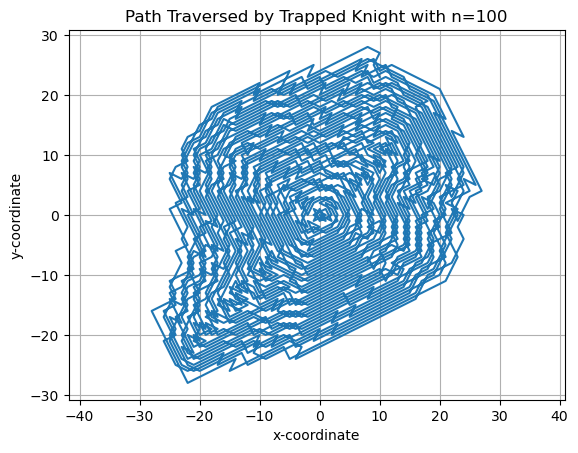

PyObject Text(0.5, 1.0, 'Path Traversed by Trapped Knight with n=100')

In [151]:
using PyPlot
plot(x, -y);
axis("equal")
grid(true)
xlabel("x-coordinate")
ylabel("y-coordinate")
title("Path Traversed by Trapped Knight with n=100")